<a href="https://colab.research.google.com/github/jdrodriguez1000/mlb/blob/main/mlb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto: Pronostico de carreras basado en el numero de bateos por equipo**

## **Definicion**

### **Estudio**

El estudio pretende determinar la relacion entre el numero de bateos y el numero de carreras realizada por un equipo.

### **Objetivo**
Construir un pronostico de carreras alcanzadas segun del numero de bateos realizacos.

### **Modelo**
Se realizara el estudio basado en un modelo de regresion lineal.

## **Activacion de librerias**

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# librerias graficas
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import matplotlib.ticker as ticker

# Procesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuracion matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore');

# Eliminacion de la notacion cientifica
pd.options.display.float_format = '{:.1f}'.format

## **Importacion set de datos**

In [2]:
# Conexion a google drive

from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


In [3]:
# Carga del set de datos

setDatos= pd.read_csv("/content/drive/MyDrive/Fuentes/EquiposMLB.txt")
setDatos.head()

,Equpo,Bateos,Carreras
0,Texas Rangers,5659,855
1,Boston Red Sox,5710,875
2,Detroit Tigers,5563,767
3,Kansas City Royals,5672,730
4,New York Mets,5532,762


## **Analisis exploratorio**

### **Informacion general**

In [4]:
# Tamaño del set de datos
setDatos.shape

(30, 3)

In [5]:
# Tipo de datos del set
setDatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Equpo     30 non-null     object
 1   Bateos    30 non-null     int64 
 2   Carreras  30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [6]:
# Renombrar columnas
setDatos.rename(columns ={'Equpo':'equipo',
                          'Bateos':'bateos',
                          'Carreras':'carreras'
},
inplace = True)
setDatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   equipo    30 non-null     object
 1   bateos    30 non-null     int64 
 2   carreras  30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [7]:
# Informacion de datos faltantes del set
setDatos.isna().sum()

equipo      0
bateos      0
carreras    0
dtype: int64

### **Variable objetivo**

In [8]:
# Estadisticos descriptivos para la variable respuesta carreras
setDatos['carreras'].describe()

count    30.0
mean    692.9
std      81.8
min     556.0
25%     629.0
50%     705.5
75%     734.0
max     875.0
Name: carreras, dtype: float64

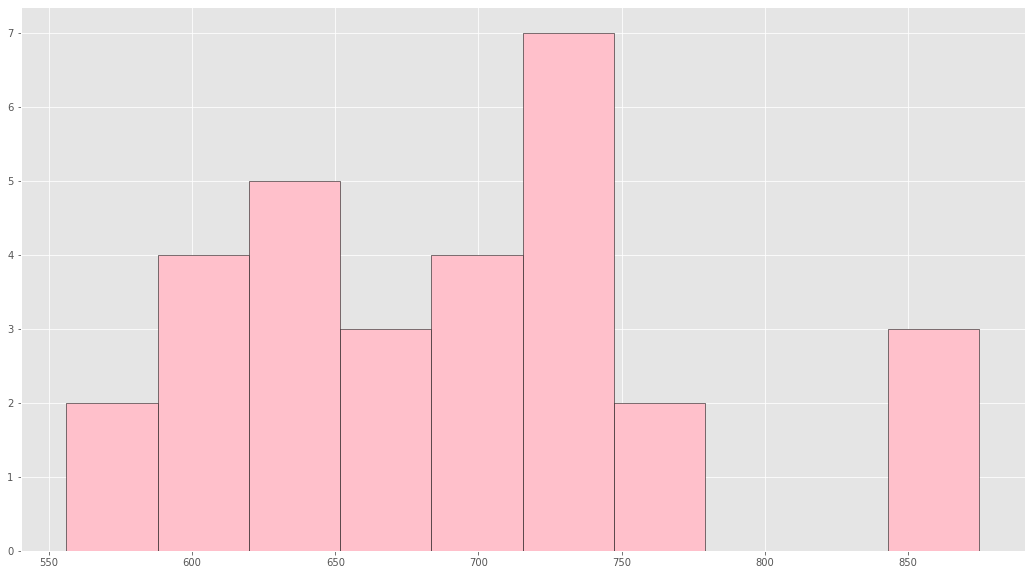

In [9]:
# Histograma de la variable respuesta carreras
plt.rcParams["figure.figsize"] = (18, 10)
plt.hist(setDatos['carreras'], bins = 10, ec = 'black', color = 'pink')
plt.show()

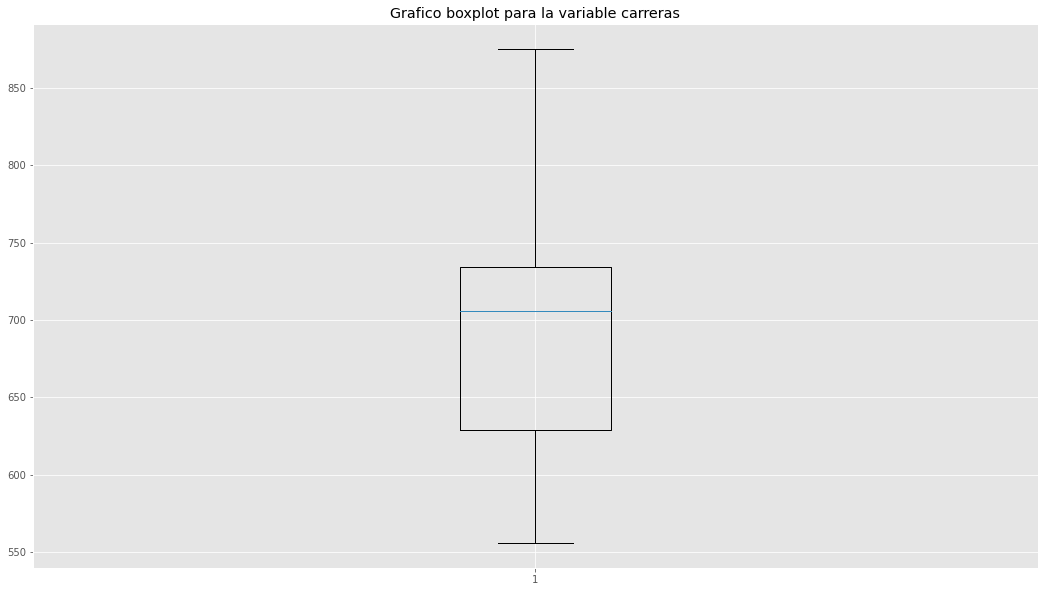

In [10]:
# Grafico de boxplot par identificacion de outliers
plt.rcParams["figure.figsize"] = (18, 10)
plt.grid(True)
plt.boxplot(setDatos['carreras'])
plt.title('Grafico boxplot para la variable carreras')
plt.show()

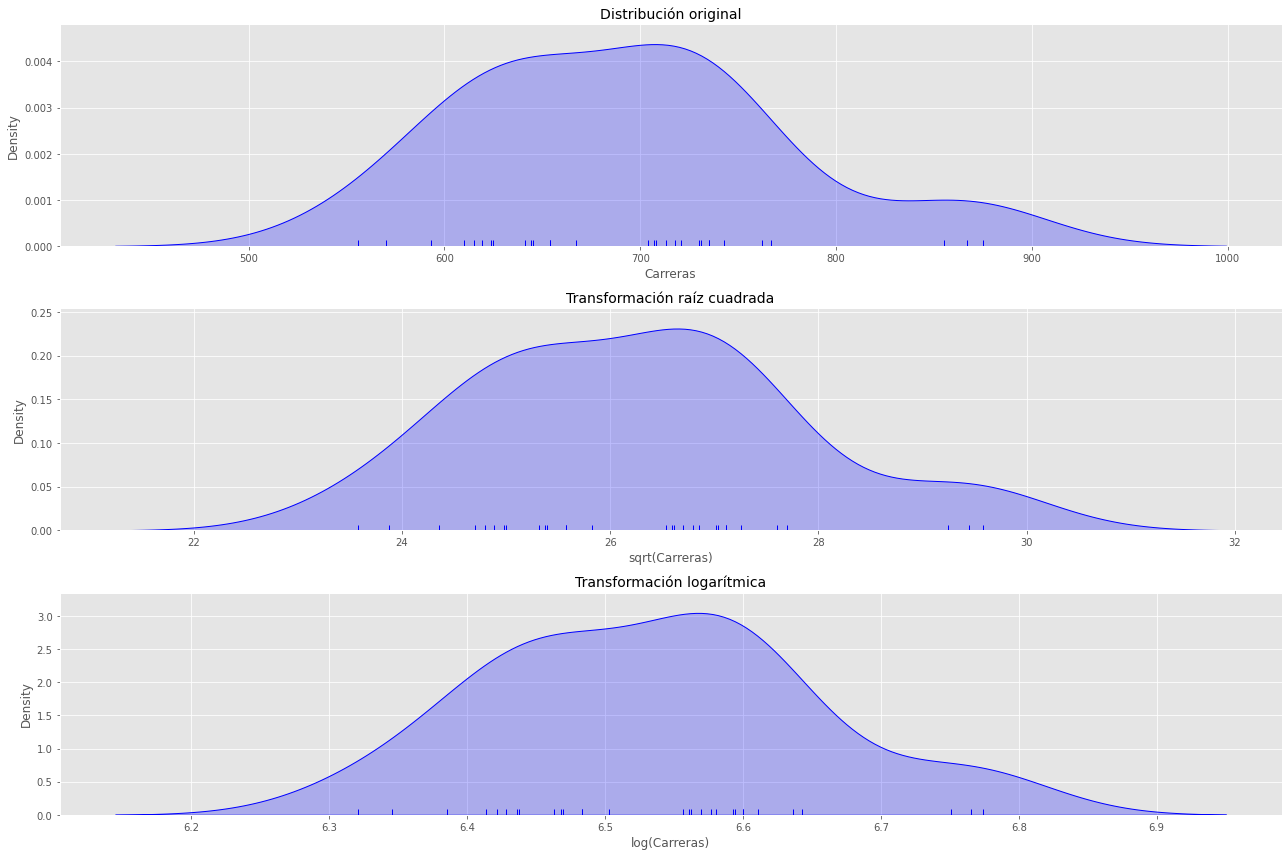

In [11]:
# Distribucion de la variable respuesta carreras

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 12))
sns.distplot(
    setDatos.carreras,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 14)
axes[0].set_xlabel('Carreras', fontsize=12) 
axes[0].tick_params(labelsize = 10)

sns.distplot(
    np.sqrt(setDatos.carreras),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 14)
axes[1].set_xlabel('sqrt(Carreras)', fontsize=12) 
axes[1].tick_params(labelsize = 10)

sns.distplot(
    np.log(setDatos.carreras),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 14)
axes[2].set_xlabel('log(Carreras)', fontsize=12) 
axes[2].tick_params(labelsize = 10)

fig.tight_layout()

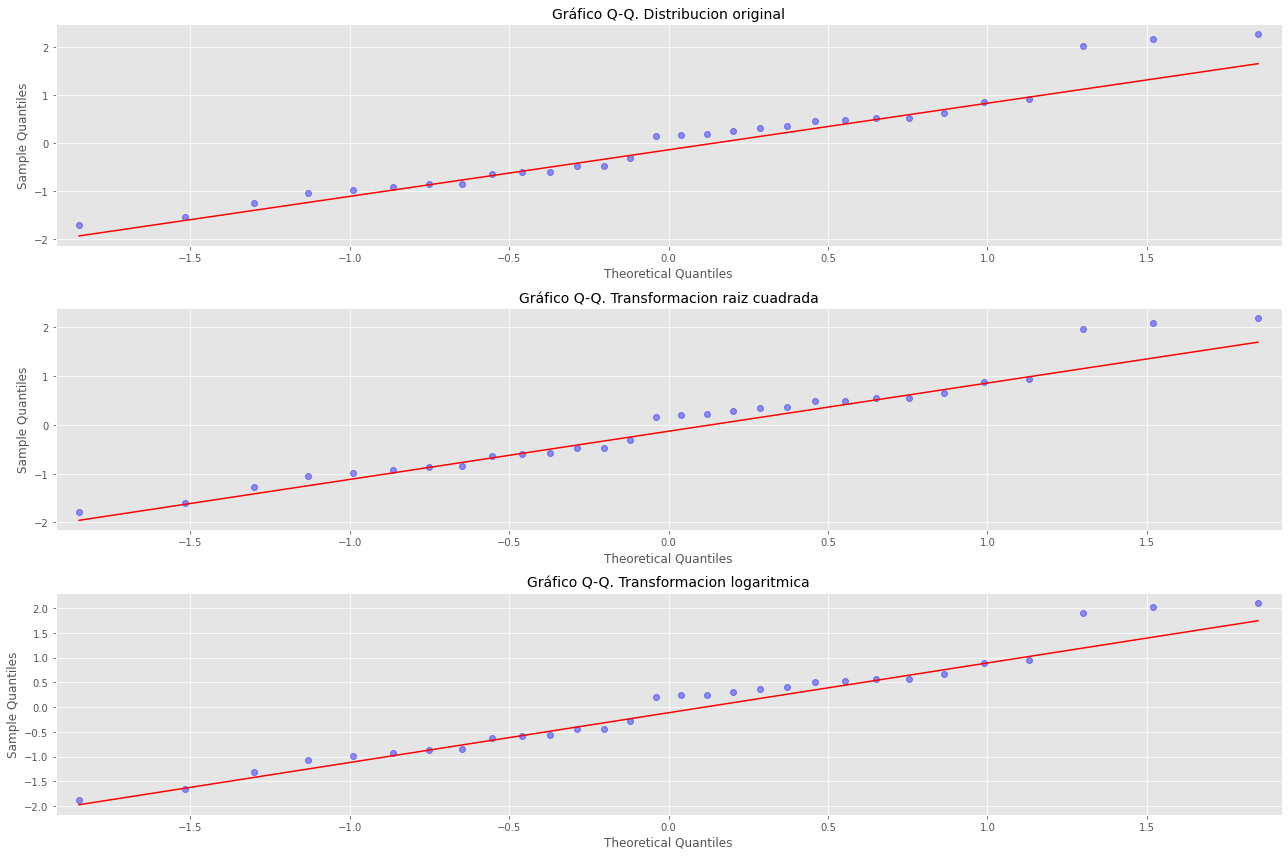

In [12]:
# Grafico Q-Q para la variable independiente carreras

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 12))

sm.qqplot(
    setDatos.carreras,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax[0]
)
ax[0].set_title('Gráfico Q-Q. Distribucion original', fontsize = 14)
ax[0].tick_params(labelsize = 10)

sm.qqplot(
    np.sqrt(setDatos.carreras),
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax[1]
)
ax[1].set_title('Gráfico Q-Q. Transformacion raiz cuadrada', fontsize = 14)
ax[1].tick_params(labelsize = 10)

sm.qqplot(
    np.log(setDatos.carreras),
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax[2]
)
ax[2].set_title('Gráfico Q-Q. Transformacion logaritmica', fontsize = 14)
ax[2].tick_params(labelsize = 10)

fig.tight_layout()

In [13]:
# Medida de asimetria y curtosis para la variable de respuesta ventas.
setDatos['carreras'].agg(['skew', 'kurtosis'])


# Asimetria:
# Bastante simetrico entre -0.5 a 0.5
# Sesgado moderado: -1.0 a -0.5 o 0.5 a 1
# Altamente moderado < a -1.0 o > a 1.0 

skew       0.6
kurtosis   0.1
Name: carreras, dtype: float64

In [14]:
# Test de normalidad Shapiro-Wilk test para la variable de respuesta ventas

shapiro_test = stats.shapiro(setDatos['carreras'])
shapiro_test

# Si p-value > 0.05 se asume que la distribucion tiene un comportamiento normal 

ShapiroResult(statistic=0.9453119039535522, pvalue=0.12647771835327148)

In [15]:
# Test de normalidad D'Agostino's K-squared para la variable de respuesta ventas

k2, p_value = stats.normaltest(setDatos['carreras'])
print(f"Estadítico= {k2}, p-value = {p_value}")

# Si p-value > 0.05 se asume que la distribucion tiene un comportamiento normal

Estadítico= 2.1283201202763005, p-value = 0.34501752707055605


### **Variable independiente**

In [16]:
# Estadisticos descriptivos para la variable indepediente numerica Bateos

setDatos['bateos'].describe()

count     30.0
mean    5529.0
std       76.5
min     5421.0
25%     5474.8
50%     5523.0
75%     5576.5
max     5710.0
Name: bateos, dtype: float64

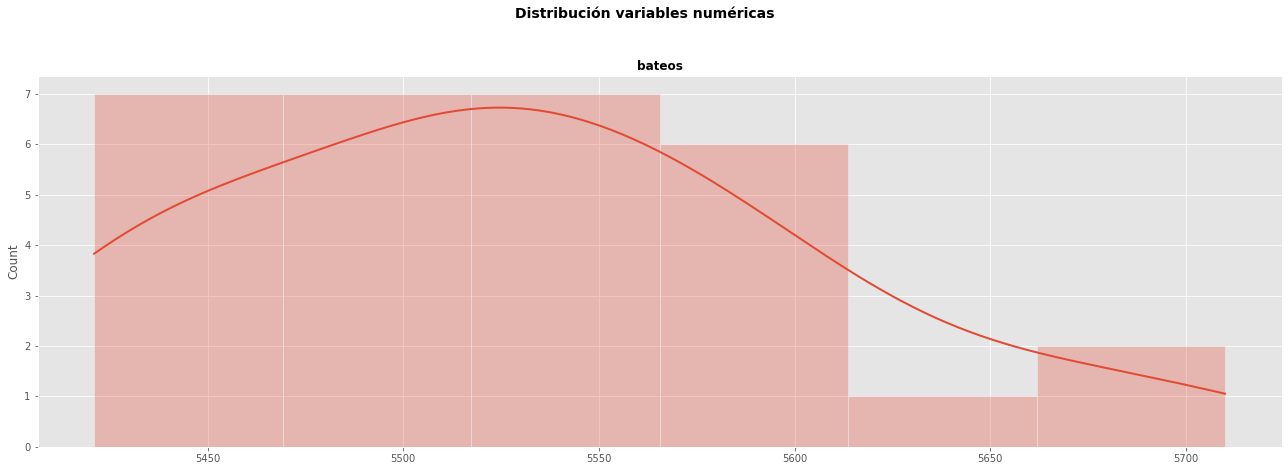

In [17]:
# Distribucion grafica de la variable numerica, sin la variable de respuesta

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
axes = axes.flat
columnas_numeric = setDatos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('carreras')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = setDatos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
# Se eliminan los axes vacíos
for i in [1]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 14, fontweight = "bold");

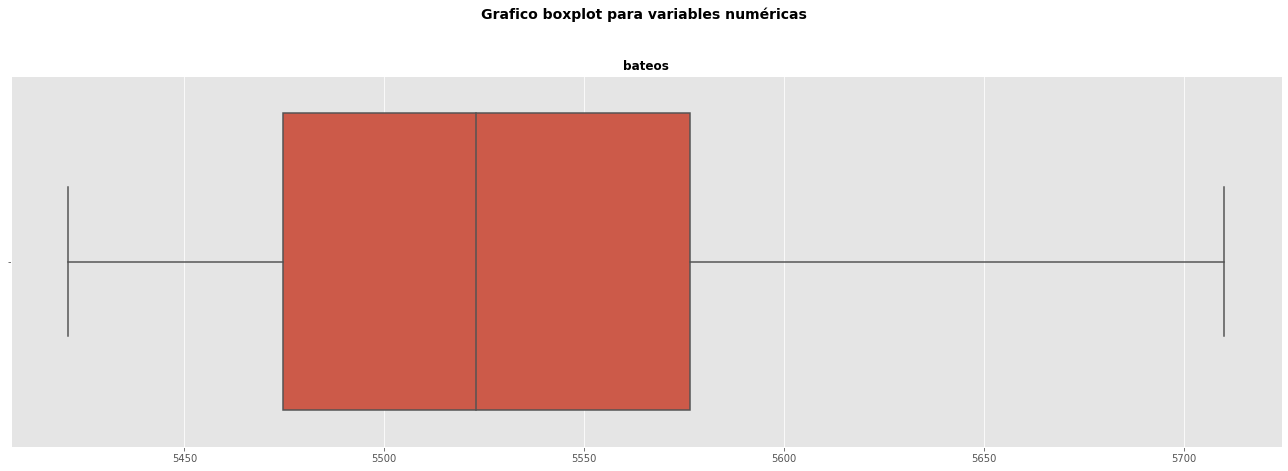

In [18]:
#Grafico de boxplot par identificacion de outliers para las variables independientes

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
axes = axes.flat
columnas_numeric = setDatos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('carreras')

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        data    = setDatos,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
# Se eliminan los axes vacíos
for i in [1]:
    fig.delaxes(axes[i]);
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Grafico boxplot para variables numéricas', fontsize = 14, fontweight = "bold");

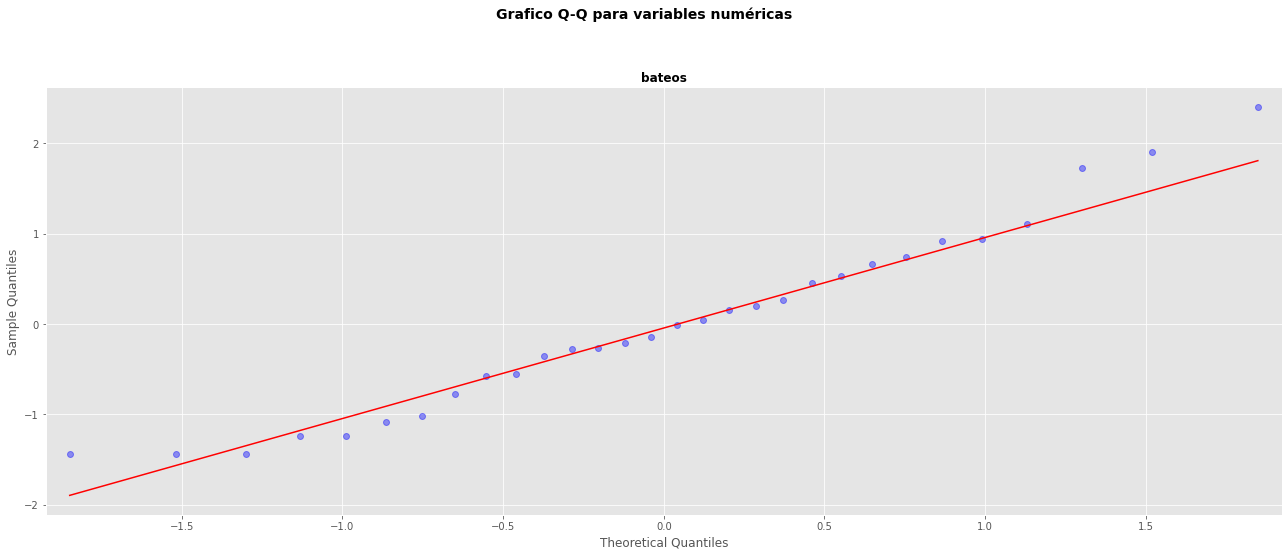

In [19]:
# Grafico Q-Q para las variables independientes

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
axes = axes.flat
columnas_numeric = setDatos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('carreras')

for i, colum in enumerate(columnas_numeric):
    sm.qqplot(
      #setDatos.colum,
      data    = setDatos[colum],
      fit   = True,
      line  = 'q',
      alpha = 0.4,
      lw    = 2,
      ax    = axes[i]
  )
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
   # axes[i].set_xlabel("")
    
# Se eliminan los axes vacíos
for i in [1]:
    fig.delaxes(axes[i]);
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Grafico Q-Q para variables numéricas', fontsize = 14, fontweight = "bold");

In [20]:
# Medida de asimetria y curtosis para las variables independientes.
setTemp = setDatos[['bateos']]
setTemp.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
bateos,0.5,-0.2


In [21]:
# Test de normalidad Shapiro-Wilk test para la variable independiente tv

shapiro_test = stats.shapiro(setDatos['bateos'])
print('resultado para la variable bateos :') 
shapiro_test

resultado para la variable bateos :


ShapiroResult(statistic=0.9602687358856201, pvalue=0.314707487821579)

In [22]:
# Test de normalidad D'Agostino's K-squared para la variable independiente tv

k2, p_value = stats.normaltest(setDatos['bateos'])
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 1.4111726396923157, p-value = 0.4938189535063924


### **Correlacion de variables**

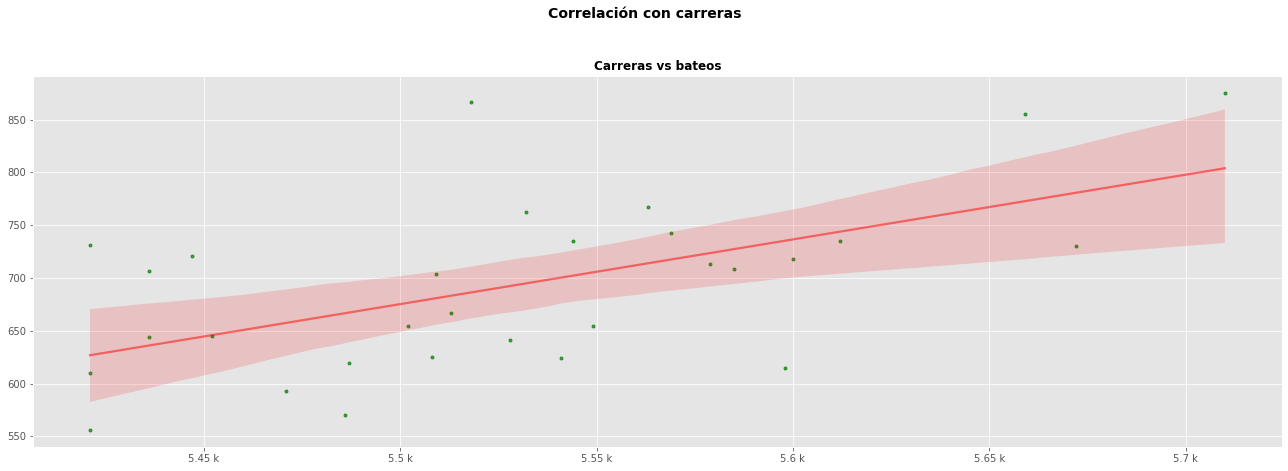

In [26]:
# Grafico de distribucion de variables numericas - Correlacion con la variable carreras

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
axes = axes.flat
columnas_numeric = setDatos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('carreras')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = setDatos[colum],
        y           = setDatos['carreras'],
        color       = "green",
        marker      = '.',
        scatter_kws = {"alpha":0.7},
        line_kws    = {"color":"r","alpha":0.5},
        ax          = axes[i]
    )
    axes[i].set_title(f"Carreras vs {colum}", fontsize = 12, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    
# Se eliminan los axes vacíos
for i in [1]:
    fig.delaxes(axes[i])
    

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con carreras', fontsize = 14, fontweight = "bold");

In [27]:
# Correlacion variables numericas - metodo Pearson

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


pd.options.display.float_format = '{:.3f}'.format
corr_matrix = setDatos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head()

## Correlacion: varia entre -1 y 1
# -1: correlacion fuerte negativa
#  0: Correlacion debil o no existe.
#  1: Correlacion fuerte positiva

## Algunas consideraciones: (no es una regla general)
# Correlacion baja: > 0.3 a <=0.5
# Correlacion moderada: > 0.5 a <= 0.7
# Correlacion fuerte: > 0.7
# Correlacion > a 0.8 suponen problemas en los modelos de regresion lineal

,variable_1,variable_2,r,abs_r
1,bateos,carreras,0.573,0.573
2,carreras,bateos,0.573,0.573


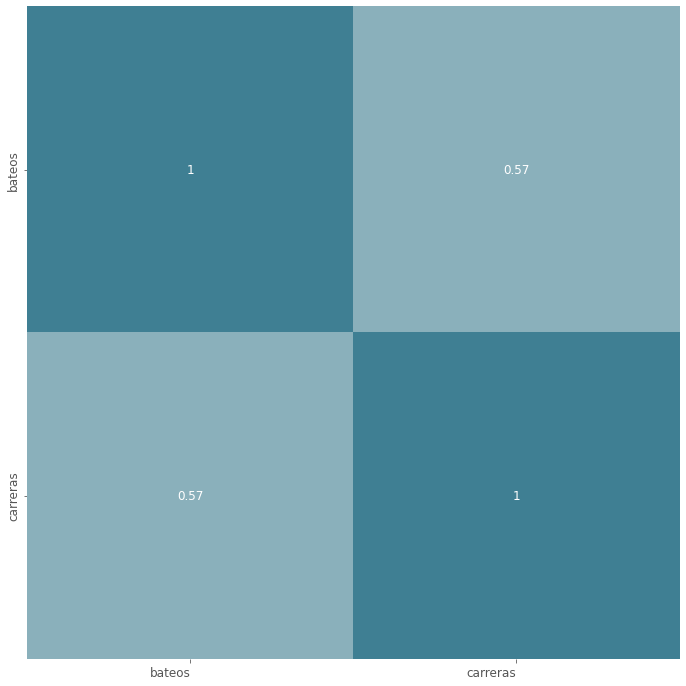

In [28]:
# Mapa de calor de la matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

## **Ajuste del modelo Regresion lineal simple**


### **Set de datos del modelo**

In [29]:
# Creacion del data frame
dt_Lineal = setDatos[['bateos', 'carreras']]
dt_Lineal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   bateos    30 non-null     int64
 1   carreras  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


### **Division del set de entrenamiento**

In [30]:
# Division set de datos de entrenamiento (80%) y pruebas (20%)

X = dt_Lineal[['bateos']]
y = dt_Lineal[['carreras']]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size   = 0.8,
    random_state = 1234
)

In [31]:
# Datos de entrenamiento
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 3 to 15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bateos  24 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes


In [32]:
# Datos de prueba
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 7 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bateos  6 non-null      int64
dtypes: int64(1)
memory usage: 96.0 bytes


In [33]:
# Datos de salida de entrenamiento
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 3 to 15
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   carreras  24 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes


In [34]:
# Datos de salida de pruebas
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 7 to 8
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   carreras  6 non-null      int64
dtypes: int64(1)
memory usage: 96.0 bytes


### **Entrenamiento del modelo**

In [ ]:
# Entrenamiento del modelo

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Accuracy del modelo de entrenamiento

error_train = modelo.score(X_train, y_train)
print("Coeficiente de determinación R^2:", modelo.score(X_train, y_train))
print("")
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X_train.columns, modelo.coef_.flatten(), )))

Coeficiente de determinación R^2: 0.2421983503727253

Intercept: [-2226.10541392]
Coeficiente: [('bateos', 0.5266294307894835)]


### **Diagnostico de residuos**

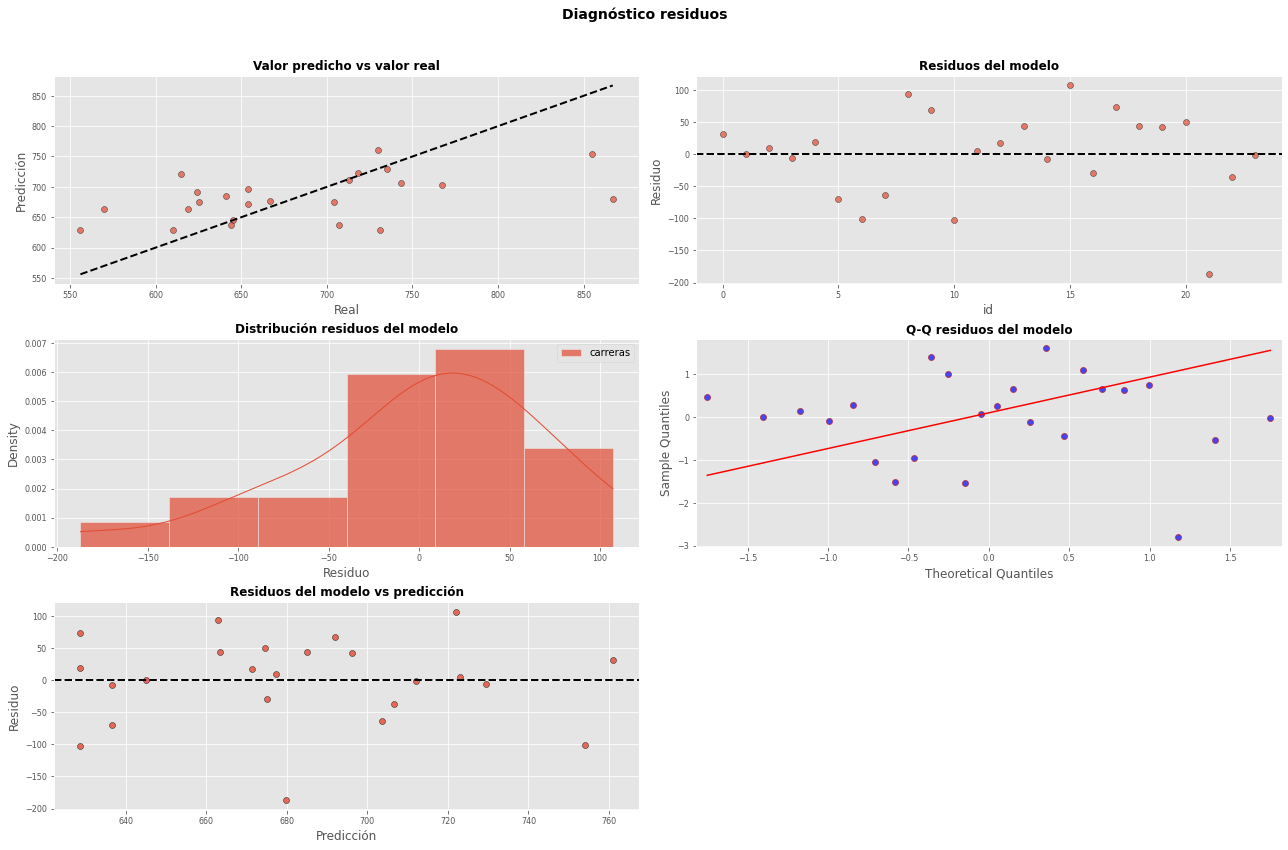

In [ ]:
# Gráficos de la distribucion de residuos

prediccion_train = modelo.predict(X_train)
residuos_train   = prediccion_train - y_train
residuos_train

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.7)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 12, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 8)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.7)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 12, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 8)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.7,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 12,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 8)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.7,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 12, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 8)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.8)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 12, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 8)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 14, fontweight = "bold");

### **Test de normalidad**

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test

shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9457544684410095, pvalue=0.21883834898471832)

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test

k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= [5.43829295], p-value = [0.065931]


### **Validacion del modelo**

In [ ]:
# Validación cruzada

cv_scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
error_cros_val = cv_scores.mean()
print(f"Error cuadratico medio: {cv_scores.mean()}")
print("")
print(f"Métricas validación cruzada: {cv_scores}")

Error cuadratico medio: -68.127199684128

Métricas validación cruzada: [ -19.81310531  -86.06438386  -57.04485647  -74.91353542 -102.80011736]


In [ ]:
# Validación cruzada repetida

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )
error_cros_val_rep = cv_scores.mean()
print(f"Error cuadratico medio: {cv_scores.mean()}")
print("")
print(f"Métricas de validación cruzada: {cv_scores}")

Error cuadratico medio: -67.65125990803483

Métricas de validación cruzada: [-109.24714564  -54.43445818  -35.02109977  -65.15318408  -70.96884792
  -79.05949248  -31.95684741 -113.90548115  -34.95217834  -70.16207094
  -57.34179774 -100.66731579  -62.95393436  -58.93694828  -61.69916722
  -25.02337215  -90.75938927  -73.29787484  -91.75261048  -61.90529815
  -85.09172084  -88.3567124   -36.74537088 -109.12850878  -22.76067059]


In [ ]:
# Validación cruzada repetida paralelizada (multicore)

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )
error_cros_val_rep_par = cv_scores.mean()
print(f"Error cuadratico medio: {cv_scores.mean()}")
print("")
print(f"Métricas de validación cruzada: {cv_scores}")

Error cuadratico medio: -62.87990946777588

Métricas de validación cruzada: [-126.59702351  -97.11740958  -40.43269463  -10.97732135  -53.09644207
  -31.54227696  -28.12625541  -89.71887332  -98.90625704  -34.12751634
  -76.98780053  -69.52000366  -33.27566213  -48.85253963  -92.80227049
 -138.00741401  -50.19561725  -21.48517046  -92.92854044  -47.54442782
  -58.42557659 -127.65278933  -82.30710176  -75.7427584   -34.82378036
  -40.84044113  -83.43389602  -39.06937616  -86.72472225   -8.75422265
  -14.85136529  -73.29656293  -96.70191907  -61.80451789  -72.61155672
  -31.21523141 -138.63057129  -29.37003154  -73.52308286  -33.23415562
  -78.6256005   -62.22172262  -91.93174035  -33.20831255  -23.99165408
 -139.54462132  -36.63450387  -95.87436808  -31.34193215   -5.36584195]


In [ ]:
# Validación cruzada repetida con múltiples métricas

pd.options.display.float_format = '{:.4f}'.format
cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'accuracy', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_accuracy,train_accuracy,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.0055,0.0031,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0026,0.0030,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0020,0.0019,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0020,0.0020,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0019,0.0019,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0019,0.0020,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0020,0.0018,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0019,0.0018,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0019,0.0019,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0019,0.0020,NaN,NaN,NaN,NaN,NaN,NaN


### **Prediccion del modelo**

In [ ]:
# Predicciones con el set de pruebas X_test, devuelve y_pred
y_pred = modelo.predict(X_test)
y_pred

array([[642.44509559],
       [715.11995704],
       [687.20859721],
       [780.94863589],
       [655.08420193],
       [693.52815038]])

In [ ]:
# Resultado del modelo

error_test = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )
print(f'Error cuadrativo medio: {error_test}')
print('')
r2_puntaje = r2_score(y_test, y_pred)
print(f'Coeficiente de determinación R^2: {r2_puntaje}')

Error cuadrativo medio: 66.12531317914653

Coeficiente de determinación R^2: 0.3659182864611461


In [ ]:
# Resumen errores del modelo

pd.options.display.float_format = '{:.4f}'.format

errors_modelos = [[ abs(error_cros_val), abs(error_cros_val_rep), abs(error_cros_val_rep_par), error_test]]
columnas = ['Val cruzada', 'Val cruz repetida', 'Val cruz rep paralela', 'Test']

print(f'Clasificacion del set de entrenamiento: {error_train}')
print('')
print ('Resumen errores cuadraticos medios del modelo')
df_errors = pd.DataFrame(errors_modelos, columns=columnas)
print(df_errors)
print('')
print(f'Clasificacion del set de predicciones: {r2_puntaje}')

Clasificacion del set de entrenamiento: 0.2421983503727253

Resumen errores cuadraticos medios del modelo
   Val cruzada  Val cruz repetida  Val cruz rep paralela    Test
0      68.1272            67.6513                62.8799 66.1253

Clasificacion del set de predicciones: 0.3659182864611461


### **Pronosticos**

In [ ]:
#Pronostico 1:

print('Numero de carreras: ')
X_pron = pd.DataFrame({'bateos': [5260]})
modelo.predict(X_pron)

Numero de carreras: 


array([[543.96539203]])

In [ ]:
#Pronostico 2:

print('Numero de carreras: ')
X_pron = pd.DataFrame({'bateos': [5560]})
modelo.predict(X_pron)

Numero de carreras: 


array([[701.95422127]])